In [18]:
#importing necessary libraries and the cleaned survey df
from cleaned_survey import df
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

In [19]:
#exploration of data
df.head()

,Timestamp,1. Have you ever been to Universal Studios?,2. How frequently do you visit a theme park?,3. What is your age?,4. What is your gender?,5. What is your monthly income?,"6. What is your nationality? If you select ""Other"", please specify.",7. Who do you usually go to theme parks with? (Select all that apply),8. What types of rides do you prefer?,9. What time of the day are you usually in the theme park? (Select all that apply),...,"28. What dissuades you from wanting to visit a theme park? If you select ""Other"", please specify",29. How do you typically decide which attractions to visit at a theme park?,"30. What do you spend the most money on in a theme park (excluding the admission ticket)? If you select ""Other"", please specify",31. (Optional - only if you have recently been to USS) Which areas did you visit and in what order? (Select only the areas which you have visited) [Hollywood],31. (Optional - only if you have recently been to USS) Which areas did you visit and in what order? (Select only the areas which you have visited) [Minion Land],31. (Optional - only if you have recently been to USS) Which areas did you visit and in what order? (Select only the areas which you have visited) [Far Far Away],31. (Optional - only if you have recently been to USS) Which areas did you visit and in what order? (Select only the areas which you have visited) [The Lost World],31. (Optional - only if you have recently been to USS) Which areas did you visit and in what order? (Select only the areas which you have visited) [Ancient Egypt],31. (Optional - only if you have recently been to USS) Which areas did you visit and in what order? (Select only the areas which you have visited) [Sci-fi City],31. (Optional - only if you have recently been to USS) Which areas did you visit and in what order? (Select only the areas which you have visited) [New York]
0,15/02/2025 19:01:30,Yes,Once every 2-3 years,19-25 years old,Female,No income,singaporean/pr,"Friends, Family",High-intensity rides,"Morning (10am-12pm), Afternoon (12pm-5pm), Eve...",...,"Crowd, Costs (F&B, admission tickets, etc.), L...",A mix of both of the above —some planned rides...,F&B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16/02/2025 10:44:01,Yes,Once every 2-3 years,19-25 years old,Female,No income,singaporean/pr,"Friends, Family",High-intensity rides,"Morning (10am-12pm), Afternoon (12pm-5pm), Eve...",...,"Crowd, Costs (F&B, admission tickets, etc.), L...",I stick to the few rides/attractions that I en...,F&B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16/02/2025 11:16:23,Yes,When on vacation,19-25 years old,Male,No income,singaporean/pr,"Friends, Family",Medium-intensity rides,"Morning (10am-12pm), Afternoon (12pm-5pm)",...,"Crowd, Costs (F&B, admission tickets, etc.), L...",A mix of both of the above —some planned rides...,F&B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16/02/2025 11:22:17,Yes,< Once every 3 years,46-54 years old,Female,"$6,000 - $9,999",singaporean/pr,Family,Low-intensity rides,Morning (10am-12pm),...,"Crowd, Costs (F&B, admission tickets, etc.), L...",A mix of both of the above —some planned rides...,"Transportation (e.g. Parking, taxi fares etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16/02/2025 11:22:40,Yes,< Once every 3 years,55 and above,Female,No income,singaporean/pr,Family,I do not go on any rides,"Morning (10am-12pm), Afternoon (12pm-5pm), Eve...",...,"Costs (F&B, admission tickets, etc.), Unpredic...",A mix of both of the above —some planned rides...,F&B,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#making new dataframe consisting of only variables of interest to guest segmentation
demographics = df.iloc[:,2:9]
spending_cat = df.iloc[:,37]

new_df = pd.concat([demographics,spending_cat], axis = 1)
new_df.head()

,2. How frequently do you visit a theme park?,3. What is your age?,4. What is your gender?,5. What is your monthly income?,"6. What is your nationality? If you select ""Other"", please specify.",7. Who do you usually go to theme parks with? (Select all that apply),8. What types of rides do you prefer?,"30. What do you spend the most money on in a theme park (excluding the admission ticket)? If you select ""Other"", please specify"
0,Once every 2-3 years,19-25 years old,Female,No income,singaporean/pr,"Friends, Family",High-intensity rides,F&B
1,Once every 2-3 years,19-25 years old,Female,No income,singaporean/pr,"Friends, Family",High-intensity rides,F&B
2,When on vacation,19-25 years old,Male,No income,singaporean/pr,"Friends, Family",Medium-intensity rides,F&B
3,< Once every 3 years,46-54 years old,Female,"$6,000 - $9,999",singaporean/pr,Family,Low-intensity rides,"Transportation (e.g. Parking, taxi fares etc.)"
4,< Once every 3 years,55 and above,Female,No income,singaporean/pr,Family,I do not go on any rides,F&B


In [21]:
#renaming the columns for easy access
new_df.columns = ['frequency','age','gender','monthly_income','nationality','companion','ride_intensity','spending_cat']
new_df.head()

,frequency,age,gender,monthly_income,nationality,companion,ride_intensity,spending_cat
0,Once every 2-3 years,19-25 years old,Female,No income,singaporean/pr,"Friends, Family",High-intensity rides,F&B
1,Once every 2-3 years,19-25 years old,Female,No income,singaporean/pr,"Friends, Family",High-intensity rides,F&B
2,When on vacation,19-25 years old,Male,No income,singaporean/pr,"Friends, Family",Medium-intensity rides,F&B
3,< Once every 3 years,46-54 years old,Female,"$6,000 - $9,999",singaporean/pr,Family,Low-intensity rides,"Transportation (e.g. Parking, taxi fares etc.)"
4,< Once every 3 years,55 and above,Female,No income,singaporean/pr,Family,I do not go on any rides,F&B


In [22]:
#data processing and feature engineering
#mapping frequencies to rare, moderate, frequent, traveller
freq_mapping = {
    '< Once every 3 years': 'rare',
    'Once every 2-3 years': 'rare',
    'Once every year': 'moderate',
    'A few times every year': 'frequent',
    'Once every month': 'frequent',
    '> Once every month': 'frequent',
    'When on vacation': 'traveller'
}
new_df['frequency'] = new_df['frequency'].replace(freq_mapping) 

#mapping age to young, adults, middle-aged, elderly
age_mapping = {
    '<15 years old': 'young',
    '15-18 years old': 'young',
    '19-25 years old': 'adult',
    '26-35 years old': 'adult',
    '36-45 years old': 'middle-aged',
    '46-54 years old': 'middle-aged',
    '55 and above': 'elderly'
}
new_df['age'] = new_df['age'].replace(age_mapping)

#converting gender values to lower case for consistency
new_df['gender'] = new_df['gender'].str.lower()

#mapping monthly income to low, middle and high
income_mapping = {
    'No income':'low',
    'Below $2000': 'low',
    '$2,000 - $5,999': 'middle',
    '$6,000 - $9,999': 'middle',
    '$10,000 - $19,999': 'high',
    '$20,000 and above': 'high'
}

new_df['monthly_income'] = new_df['monthly_income'].replace(income_mapping)

#mapping nationality to singaporean/pr and foreigners
new_df['nationality'] = new_df['nationality'].apply(lambda x: 'foreigners' if x != 'singaporean/pr' else x)

#mapping ride intensity values to low, medium, high and do not ride
intensity_mapping = {
    'Low-intensity rides': 'low',
    'Medium-intensity rides': 'medium',
    'High-intensity rides': 'high',
    'I do not go on any rides': 'do not ride'
}
new_df['ride_intensity'] = new_df['ride_intensity'].replace(intensity_mapping)

#pivoting the dataframe such that each companion option becomes a binary column

df_expanded = (new_df['companion'].str.get_dummies(sep=','))
df_expanded = df_expanded[df_expanded.columns[3:7]]

df_expanded.columns = ['couple','family','friends','single']
new_df = new_df.join(df_expanded)
new_df = new_df.drop('companion', axis = 1)

new_df

,frequency,age,gender,monthly_income,nationality,ride_intensity,spending_cat,couple,family,friends,single
0,rare,adult,female,low,singaporean/pr,high,F&B,0,0,1,0
1,rare,adult,female,low,singaporean/pr,high,F&B,0,0,1,0
2,traveller,adult,male,low,singaporean/pr,medium,F&B,0,0,1,0
3,rare,middle-aged,female,middle,singaporean/pr,low,"Transportation (e.g. Parking, taxi fares etc.)",0,1,0,0
4,rare,elderly,female,low,singaporean/pr,do not ride,F&B,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
166,rare,adult,male,low,singaporean/pr,high,F&B,0,1,0,0
167,rare,adult,male,low,singaporean/pr,high,"Transportation (e.g. Parking, taxi fares etc.)",1,0,0,0
168,rare,adult,male,low,singaporean/pr,medium,F&B,0,0,1,0
169,traveller,middle-aged,female,middle,singaporean/pr,low,"Transportation (e.g. Parking, taxi fares etc.)",0,1,0,0


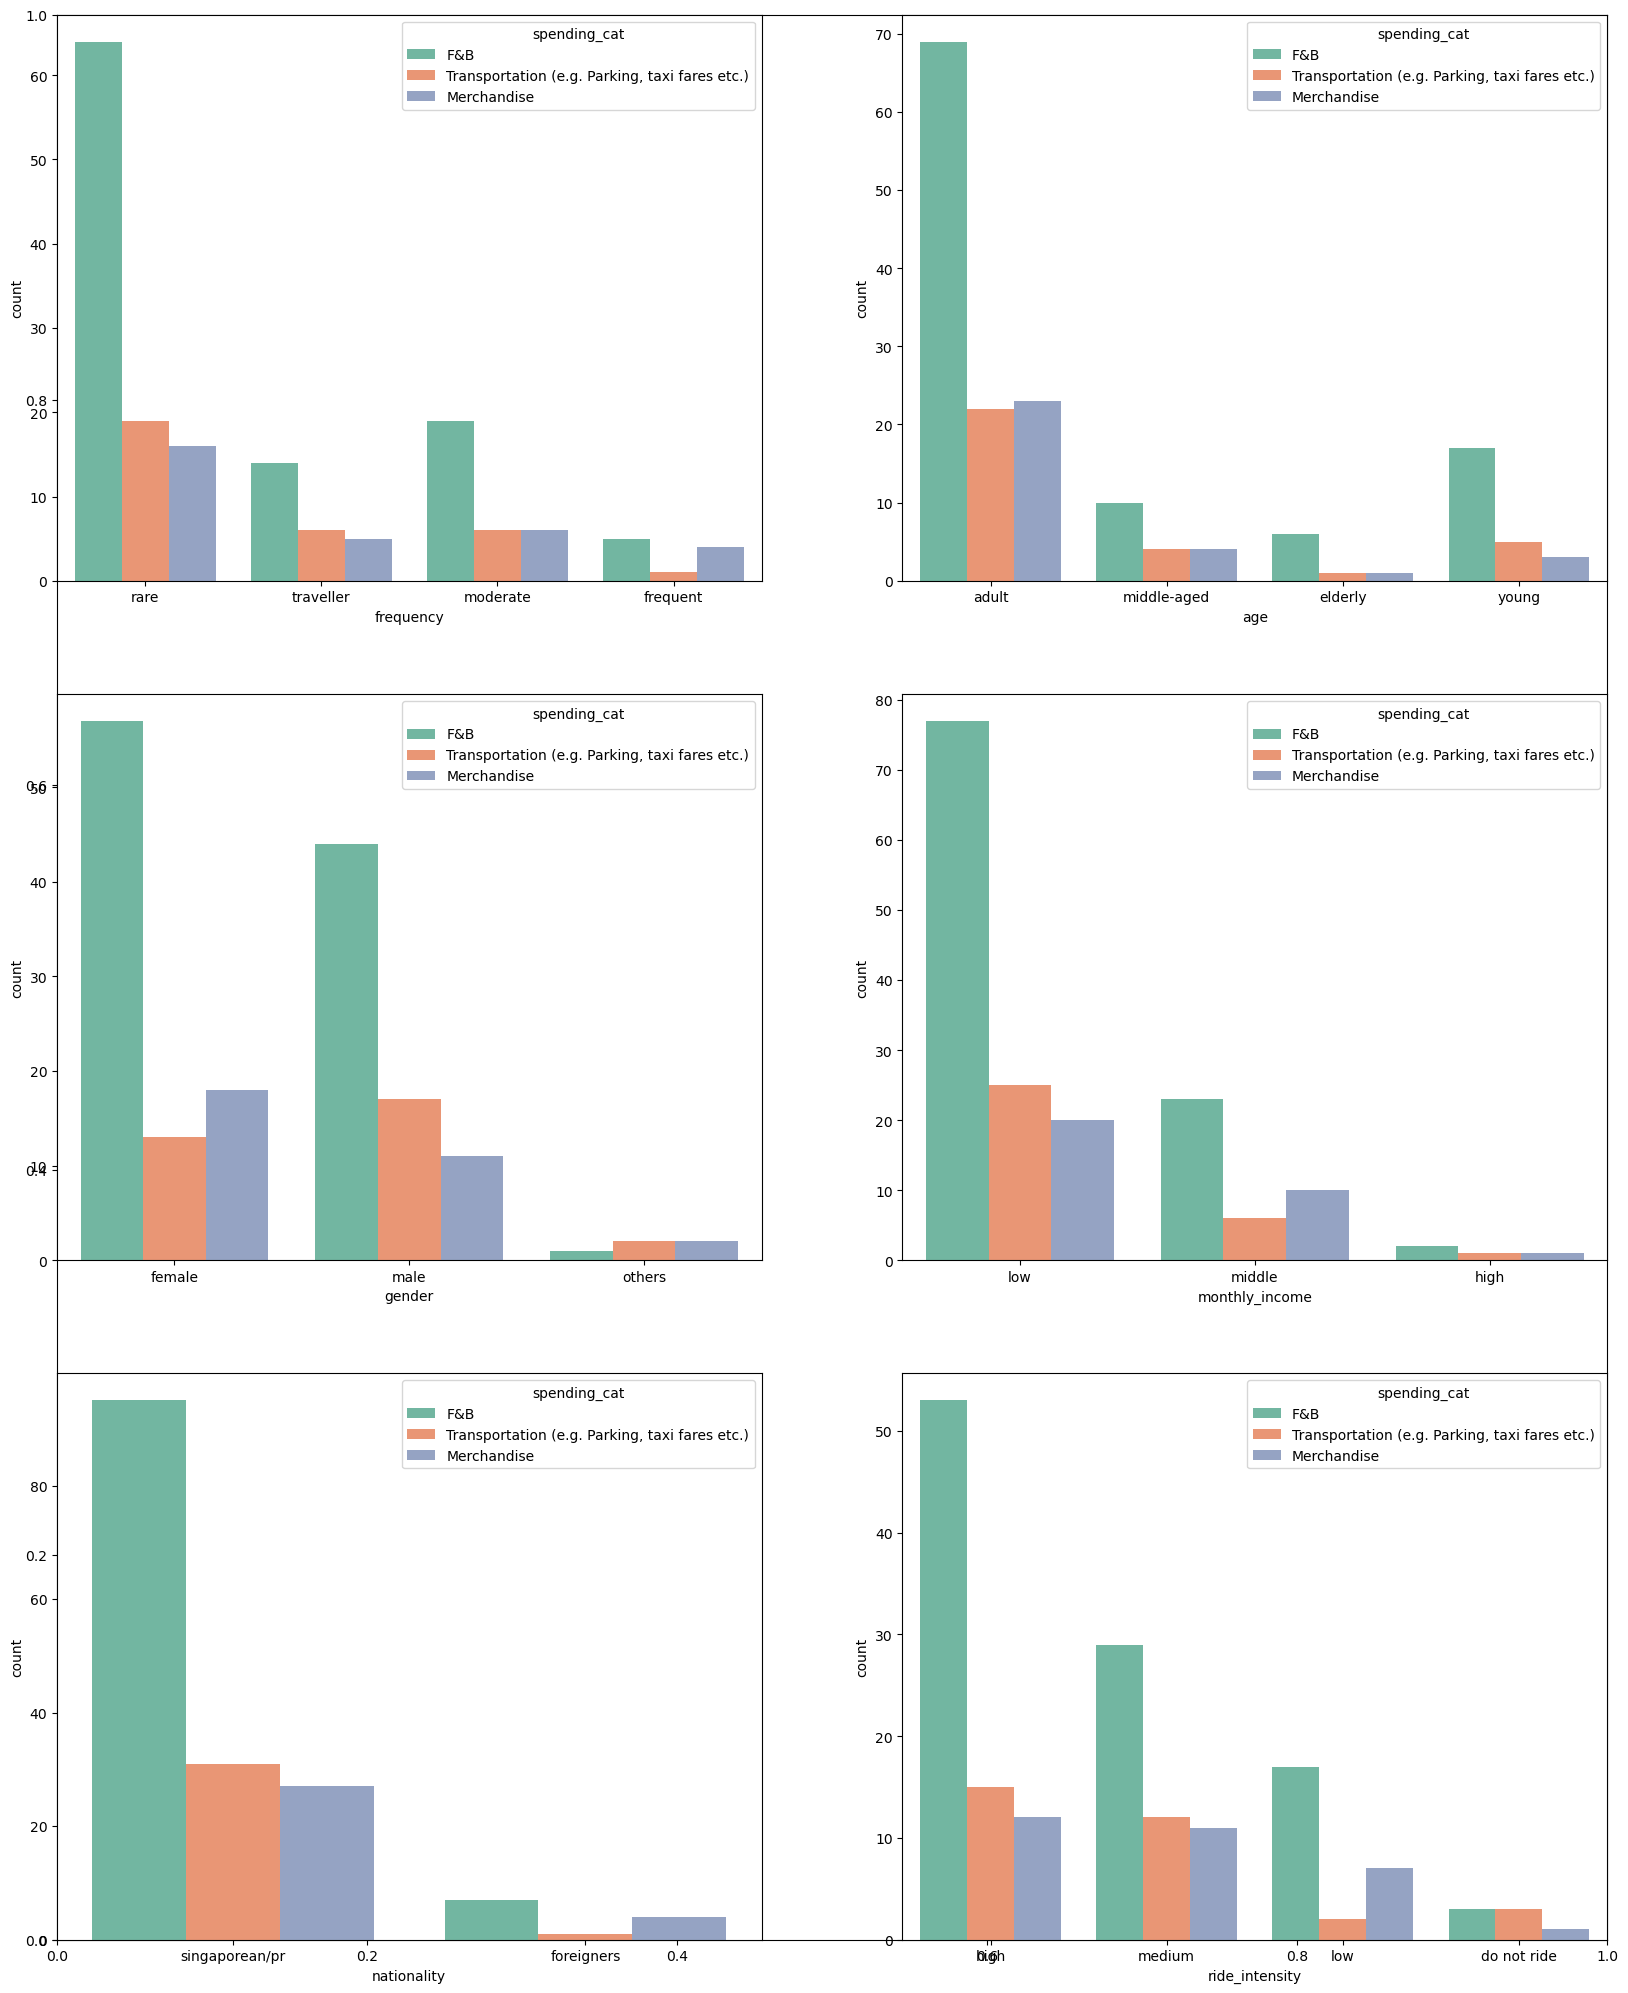

In [23]:
#exploratory data visualisations of each demographic and their highest spending category
objects = []
for col in new_df.columns:
    if new_df[col].dtype == object:
        objects.append(col)
objects.remove('spending_cat')

plt.subplots(figsize=(20, 25))
for i, col in enumerate(objects):
    plt.subplot(3, 2, i + 1)
    sb.countplot(x=col, hue='spending_cat', data=new_df, palette='Set2')
plt.show()

In [24]:
#categorising those who spend most on transport as low spenders; 
#those who spend most on f&b as average spenders;
#those who spend most on merchandise as high spenders
spender_mapping = {
    'Transportation (e.g. Parking, taxi fares etc.)': 'low spender',
    'F&B': 'average spender',
    'Merchandise': 'high spender'
}

spending_order = ['low spender', 'average spender', 'high spender']

new_df['spending_cat'] = new_df['spending_cat'].replace(spender_mapping)
new_df = new_df.rename(columns={'spending_cat':'spender_type'})
new_df['spender_type'] = pd.Categorical(new_df['spender_type'], categories=spending_order, ordered=True)

new_df.head()

,frequency,age,gender,monthly_income,nationality,ride_intensity,spender_type,couple,family,friends,single
0,rare,adult,female,low,singaporean/pr,high,average spender,0,0,1,0
1,rare,adult,female,low,singaporean/pr,high,average spender,0,0,1,0
2,traveller,adult,male,low,singaporean/pr,medium,average spender,0,0,1,0
3,rare,middle-aged,female,middle,singaporean/pr,low,low spender,0,1,0,0
4,rare,elderly,female,low,singaporean/pr,do not ride,average spender,0,1,0,0


In [25]:
#make freq_df that counts the number of spender types by frequency 
freq_order = ['rare', 'moderate', 'frequent', 'traveller']
new_df['frequency'] = pd.Categorical(new_df['frequency'], categories=freq_order, ordered=True)

freq_df = new_df.groupby('frequency')['spender_type'].value_counts().reset_index(name='No. of spender types based on frequency')
freq_df.sort_values(['spender_type', 'frequency'], inplace=True)
freq_df.reset_index(drop=True, inplace=True)

freq_df

,frequency,spender_type,No. of spender types based on frequency
0,rare,low spender,19
1,moderate,low spender,6
2,frequent,low spender,1
3,traveller,low spender,6
4,rare,average spender,64
5,moderate,average spender,19
6,frequent,average spender,5
7,traveller,average spender,14
8,rare,high spender,16
9,moderate,high spender,6


In [26]:
#make age_df that counts the number of spender types by age 
age_order = ['young', 'adult', 'middle-aged', 'elderly']
new_df['age'] = pd.Categorical(new_df['age'], categories=age_order, ordered=True)

age_df = new_df.groupby('age')['spender_type'].value_counts().reset_index(name='No. of spender types based on age')
age_df.sort_values(['spender_type', 'age'], inplace=True)
age_df.reset_index(drop=True, inplace=True)

age_df

,age,spender_type,No. of spender types based on age
0,young,low spender,5
1,adult,low spender,22
2,middle-aged,low spender,4
3,elderly,low spender,1
4,young,average spender,17
5,adult,average spender,69
6,middle-aged,average spender,10
7,elderly,average spender,6
8,young,high spender,3
9,adult,high spender,23


In [27]:
#make gender_df that counts the number of spender types by gender
gender_df = new_df.groupby('gender')['spender_type'].value_counts().reset_index(name='No. of spender types based on gender')
gender_df.sort_values('spender_type', inplace=True)
gender_df.reset_index(drop=True, inplace=True)

gender_df

,gender,spender_type,No. of spender types based on gender
0,female,low spender,13
1,male,low spender,17
2,others,low spender,2
3,female,average spender,57
4,male,average spender,44
5,others,average spender,1
6,female,high spender,18
7,male,high spender,11
8,others,high spender,2


In [28]:
#make income_df that counts the number of spender types by monthly income
income_order = ['low', 'middle', 'high']
new_df['monthly_income'] = pd.Categorical(new_df['monthly_income'], categories=income_order, ordered=True)

income_df = new_df.groupby('monthly_income')['spender_type'].value_counts().reset_index(name='No. of spender types based on monthly income')
income_df.sort_values(['spender_type', 'monthly_income'], inplace=True)
income_df.reset_index(drop=True, inplace=True)

income_df

,monthly_income,spender_type,No. of spender types based on monthly income
0,low,low spender,25
1,middle,low spender,6
2,high,low spender,1
3,low,average spender,77
4,middle,average spender,23
5,high,average spender,2
6,low,high spender,20
7,middle,high spender,10
8,high,high spender,1


In [29]:
#make nationality_df that counts the number of spender types by nationality
nationality_df = new_df.groupby('nationality')['spender_type'].value_counts().reset_index(name='No. of spender types based on nationality')
nationality_df.sort_values('spender_type', inplace=True)
nationality_df.reset_index(drop=True, inplace=True)

nationality_df

,nationality,spender_type,No. of spender types based on nationality
0,foreigners,low spender,1
1,singaporean/pr,low spender,31
2,foreigners,average spender,7
3,singaporean/pr,average spender,95
4,foreigners,high spender,4
5,singaporean/pr,high spender,27


In [30]:
#make intensity_df that counts the number of spender types by ride intensity
ride_order = ['do not ride', 'low', 'medium', 'high']
new_df['ride_intensity'] = pd.Categorical(new_df['ride_intensity'], categories=ride_order, ordered=True)

intensity_df = new_df.groupby('ride_intensity')['spender_type'].value_counts().reset_index(name='No. of spender types based on ride intensity')
intensity_df.sort_values(['spender_type', 'ride_intensity'], inplace=True)
intensity_df.reset_index(drop=True, inplace=True)

intensity_df

,ride_intensity,spender_type,No. of spender types based on ride intensity
0,do not ride,low spender,3
1,low,low spender,2
2,medium,low spender,12
3,high,low spender,15
4,do not ride,average spender,3
5,low,average spender,17
6,medium,average spender,29
7,high,average spender,53
8,do not ride,high spender,1
9,low,high spender,7


In [31]:
#make couple_df that counts the number of spender types by people who go with their partners
couple_df = new_df.groupby('couple')['spender_type'].value_counts().reset_index(name='No. of spender types based on going with partners')
couple_df.sort_values('spender_type', inplace=True)
couple_df.reset_index(drop=True, inplace=True)

couple_df

,couple,spender_type,No. of spender types based on going with partners
0,0,low spender,23
1,1,low spender,9
2,0,average spender,81
3,1,average spender,21
4,0,high spender,25
5,1,high spender,6


In [32]:
#make family_df that counts the number of spender types by people who go with their family
family_df = new_df.groupby('family')['spender_type'].value_counts().reset_index(name='No. of spender types based on going with family')
family_df.sort_values('spender_type', inplace=True)
family_df.reset_index(drop=True, inplace=True)

family_df

,family,spender_type,No. of spender types based on going with family
0,0,low spender,25
1,1,low spender,7
2,0,average spender,79
3,1,average spender,23
4,0,high spender,26
5,1,high spender,5


In [33]:
#make friends_df that counts the number of spender types by people who go with their friends
friends_df = new_df.groupby('friends')['spender_type'].value_counts().reset_index(name='No. of spender types based on going with friends')
friends_df.sort_values('spender_type', inplace=True)
friends_df.reset_index(drop=True, inplace=True)

friends_df

,friends,spender_type,No. of spender types based on going with friends
0,0,low spender,16
1,1,low spender,16
2,0,average spender,47
3,1,average spender,55
4,0,high spender,13
5,1,high spender,18


In [34]:
#make single_df that counts the number of spender types by people who go alone
single_df = new_df.groupby('single')['spender_type'].value_counts().reset_index(name='No. of spender types based on going alone')
single_df.sort_values('spender_type', inplace=True)
single_df.reset_index(drop=True, inplace=True)

single_df

,single,spender_type,No. of spender types based on going alone
0,0,low spender,32
1,1,low spender,0
2,0,average spender,99
3,1,average spender,3
4,0,high spender,29
5,1,high spender,2
